<h3>1. Importación de librerías</h3>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import os

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Crear directorio para resultados
os.makedirs('resultados', exist_ok=True)

<h3>2. Carga de Datos y exploración base</h3>

In [28]:
# Cargar los datos
print("Cargando datos...")
data = pd.read_csv('../data/train_es_clean.csv')
print(f"Datos cargados: {data.shape[0]} filas y {data.shape[1]} columnas")

# Mostrar primeras filas
data.head()

# Información básica
data.info()

# Estadísticas descriptivas
data.describe()

Cargando datos...
Datos cargados: 1460 filas y 81 columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            1460 non-null   int64  
 1   TipoDeClaseMS                 1460 non-null   int64  
 2   ZonificaciónMS                1460 non-null   object 
 3   FrenteLote                    1460 non-null   float64
 4   ÁreaLote                      1460 non-null   int64  
 5   Calle                         1460 non-null   object 
 6   Callejón                      1460 non-null   object 
 7   FormaLote                     1460 non-null   object 
 8   ContornoTerreno               1460 non-null   object 
 9   Servicios                     1460 non-null   object 
 10  ConfiguraciónLote             1460 non-null   object 
 11  PendienteTerreno              1460 non-null   object 
 12  Vec

,Id,TipoDeClaseMS,FrenteLote,ÁreaLote,CalidadGeneral,CondiciónGeneral,AñoConstrucción,AñoRenovación,ÁreaRevestimientoMampostería,MetrosAcabadosSótano1,...,MetrosDeckMadera,MetrosPorcheAbierto,MetrosPorcheCerrado,MetrosPorche3Estaciones,MetrosPorcheMalla,ÁreaPiscina,ValorExtra,MesVenta,AñoVenta,PrecioVenta
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,41.215461,...,8.755599,4.334879,2.039603,0.316761,1.399208,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,42.372881,...,11.644350,6.155384,5.678152,2.723668,5.180031,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,35.628300,...,0.000000,2.322575,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,66.170162,...,15.607704,6.317404,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,524.344532,...,79.617871,50.817941,51.282456,47.194724,44.593440,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3. Separación de Variables y división de datos

In [29]:
# Separar variable objetivo
y = data['PrecioVenta']

# Modelo 1: Solo CalidadGeneral
X_single = data[['CalidadGeneral']]

# División en conjuntos de entrenamiento y prueba
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_single, y, test_size=0.2, random_state=42)

print(f"Conjunto de entrenamiento: {X_train_1.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test_1.shape[0]} muestras")

Conjunto de entrenamiento: 1168 muestras
Conjunto de prueba: 292 muestras


### 4. Modelo 1: Regresión Lineal Simple (Una Variable)

In [30]:
# Normalización de características
scaler = StandardScaler()
X_train_1_scaled = scaler.fit_transform(X_train_1)
X_test_1_scaled = scaler.transform(X_test_1)

# Entrenar el modelo 1
model_1 = LinearRegression()
model_1.fit(X_train_1_scaled, y_train_1)

# Ver coeficientes
print(f"Intercepto: {model_1.intercept_:.2f}")
print(f"Coeficiente para CalidadGeneral: {model_1.coef_[0]:.2f}")

# Evaluar modelo 1
y_pred_train_1 = model_1.predict(X_train_1_scaled)
y_pred_test_1 = model_1.predict(X_test_1_scaled)

# Calcular métricas
train_r2_1 = r2_score(y_train_1, y_pred_train_1)
test_r2_1 = r2_score(y_test_1, y_pred_test_1)
train_rmse_1 = np.sqrt(mean_squared_error(y_train_1, y_pred_train_1))
test_rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_test_1))
train_mae_1 = mean_absolute_error(y_train_1, y_pred_train_1)
test_mae_1 = mean_absolute_error(y_test_1, y_pred_test_1)

# Mostrar resultados
print("\n=== Resultados Modelo 1 (Solo CalidadGeneral) ===")
print(f"R² en entrenamiento: {train_r2_1:.4f}")
print(f"R² en prueba: {test_r2_1:.4f}")
print(f"RMSE en entrenamiento: {train_rmse_1:.2f}")
print(f"RMSE en prueba: {test_rmse_1:.2f}")
print(f"MAE en entrenamiento: {train_mae_1:.2f}")
print(f"MAE en prueba: {test_mae_1:.2f}")
print(f"Diferencia de R²: {train_r2_1 - test_r2_1:.4f}")
print(f"Diferencia porcentual en RMSE: {abs((train_rmse_1 - test_rmse_1) / train_rmse_1 * 100):.2f}%")

Intercepto: 181441.54
Coeficiente para CalidadGeneral: 60668.79

=== Resultados Modelo 1 (Solo CalidadGeneral) ===
R² en entrenamiento: 0.6171
R² en prueba: 0.6505
RMSE en entrenamiento: 47789.63
RMSE en prueba: 51778.63
MAE en entrenamiento: 33628.12
MAE en prueba: 33343.24
Diferencia de R²: -0.0334
Diferencia porcentual en RMSE: 8.35%


### 5. Visualización del Modelo Simple

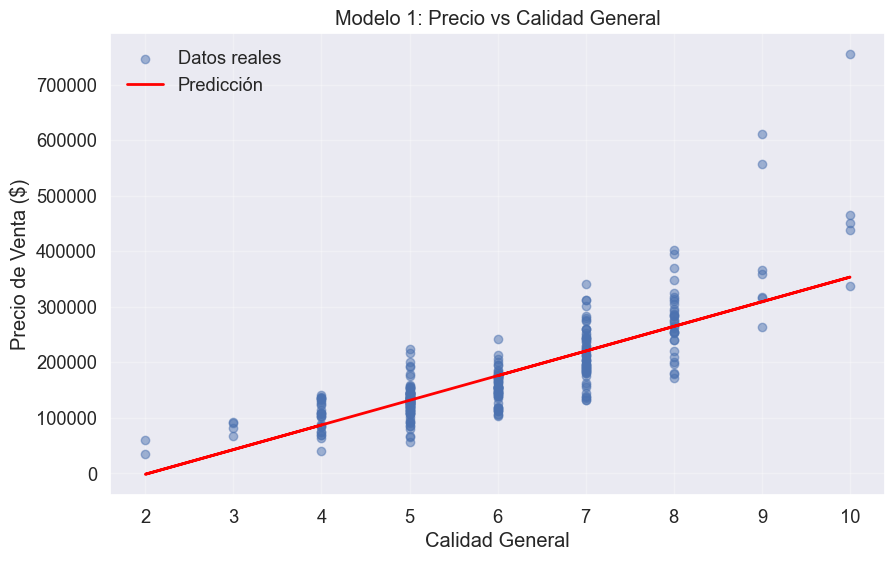

In [31]:
# Visualizar modelo 1 (relación entre calidad y precio)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_1, y_test_1, alpha=0.5, label='Datos reales')
plt.plot(X_test_1, y_pred_test_1, color='red', linewidth=2, label='Predicción')
plt.xlabel('Calidad General')
plt.ylabel('Precio de Venta ($)')
plt.title('Modelo 1: Precio vs Calidad General')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 6. Modelo 2: Regresión Lineal Múltiple (5 Variables)

In [32]:
# Seleccionar las 5 variables numéricas más importantes
X_top5 = data[['CalidadGeneral', 'MetrosHabitables', 'CochesGaraje', 
               'ÁreaGaraje', 'MetrosTotalesSótano']]

# División en conjuntos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_top5, y, test_size=0.2, random_state=42)

# Normalización
scaler_2 = StandardScaler()
X_train_2_scaled = scaler_2.fit_transform(X_train_2)
X_test_2_scaled = scaler_2.transform(X_test_2)

# Entrenar el modelo 2
model_2 = LinearRegression()
model_2.fit(X_train_2_scaled, y_train_2)

# Ver coeficientes
print("Intercepto:", model_2.intercept_)
print("Coeficientes:")
for i, feature in enumerate(X_top5.columns):
    print(f"{feature}: {model_2.coef_[i]:.2f}")

# Evaluar modelo 2
y_pred_train_2 = model_2.predict(X_train_2_scaled)
y_pred_test_2 = model_2.predict(X_test_2_scaled)

# Calcular métricas
train_r2_2 = r2_score(y_train_2, y_pred_train_2)
test_r2_2 = r2_score(y_test_2, y_pred_test_2)
train_rmse_2 = np.sqrt(mean_squared_error(y_train_2, y_pred_train_2))
test_rmse_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_test_2))
train_mae_2 = mean_absolute_error(y_train_2, y_pred_train_2)
test_mae_2 = mean_absolute_error(y_test_2, y_pred_test_2)

# Mostrar resultados
print("\n=== Resultados Modelo 2 (Top 5 variables) ===")
print(f"R² en entrenamiento: {train_r2_2:.4f}")
print(f"R² en prueba: {test_r2_2:.4f}")
print(f"RMSE en entrenamiento: {train_rmse_2:.2f}")
print(f"RMSE en prueba: {test_rmse_2:.2f}")
print(f"MAE en entrenamiento: {train_mae_2:.2f}")
print(f"MAE en prueba: {test_mae_2:.2f}")
print(f"Diferencia de R²: {train_r2_2 - test_r2_2:.4f}")
print(f"Diferencia porcentual en RMSE: {abs((train_rmse_2 - test_rmse_2) / train_rmse_2 * 100):.2f}%")

Intercepto: 181441.5419520548
Coeficientes:
CalidadGeneral: 32584.17
MetrosHabitables: 22242.03
CochesGaraje: 11773.89
ÁreaGaraje: 3293.01
MetrosTotalesSótano: 12113.62

=== Resultados Modelo 2 (Top 5 variables) ===
R² en entrenamiento: 0.7499
R² en prueba: 0.7916
RMSE en entrenamiento: 38625.41
RMSE en prueba: 39979.43
MAE en entrenamiento: 24992.04
MAE en prueba: 25284.81
Diferencia de R²: -0.0417
Diferencia porcentual en RMSE: 3.51%


### 7. Visualización del Modelo Múltiple

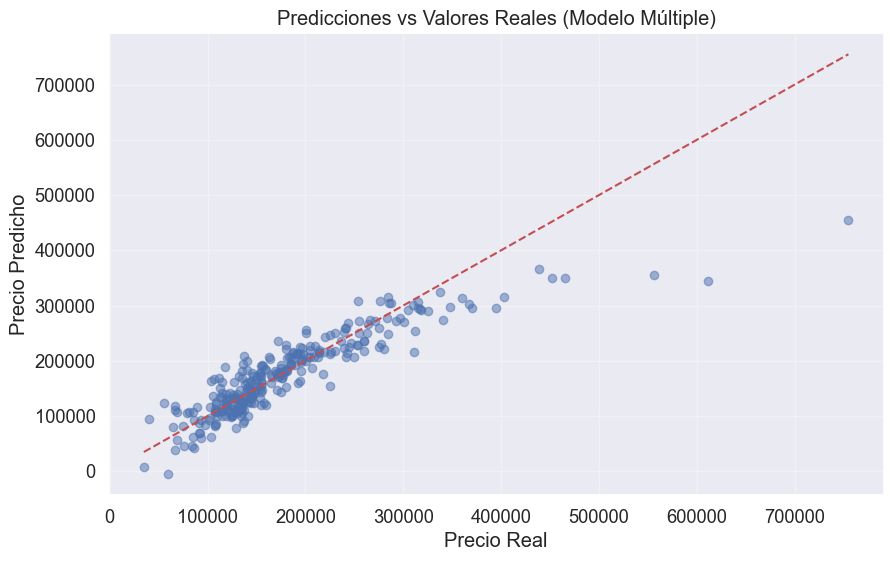

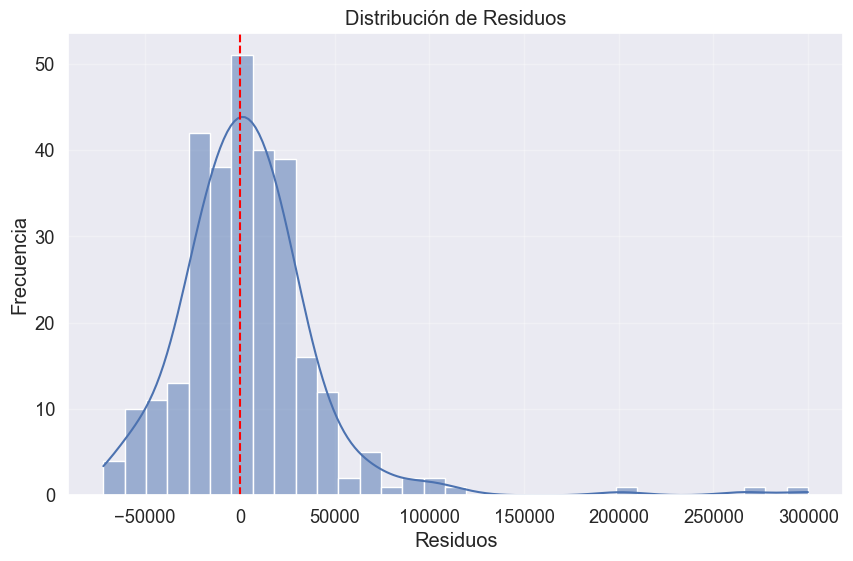

In [33]:
# Visualizar predicciones vs. reales para el modelo 2
plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, y_pred_test_2, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Valores Reales (Modelo Múltiple)')
plt.grid(True, alpha=0.3)
plt.show()

# Análisis de residuos
residuos = y_test_2 - y_pred_test_2

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.grid(True, alpha=0.3)
plt.show()

### 8. Comparación de Modelos y Conclusión

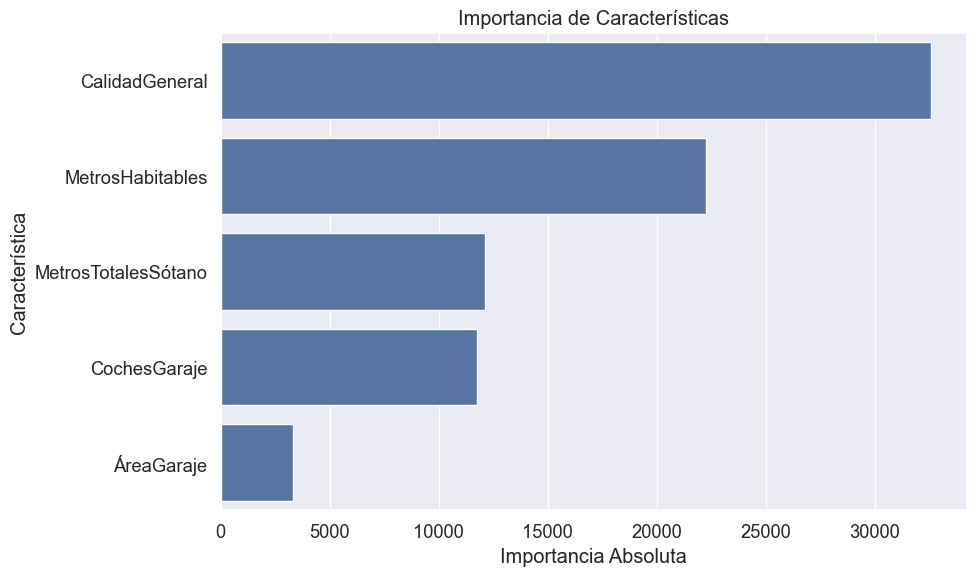

Modelo guardado en 'resultados/modelo_lineal.pkl'

✅ Entrenamiento y evaluación de modelos completados!


In [34]:
# Comparación de modelos
models_comparison = pd.DataFrame({
    'Modelo': ['Modelo 1: Solo Calidad', 'Modelo 2: Top 5 variables'],
    'R² Entrenamiento': [train_r2_1, train_r2_2],
    'R² Prueba': [test_r2_1, test_r2_2],
    'RMSE Entrenamiento': [train_rmse_1, train_rmse_2],
    'RMSE Prueba': [test_rmse_1, test_rmse_2],
    'MAE Entrenamiento': [train_mae_1, train_mae_2],
    'MAE Prueba': [test_mae_1, test_mae_2],
    'Diferencia R²': [train_r2_1 - test_r2_1, train_r2_2 - test_r2_2],
    'Diferencia % RMSE': [abs((train_rmse_1 - test_rmse_1) / train_rmse_1 * 100), 
                         abs((train_rmse_2 - test_rmse_2) / train_rmse_2 * 100)]
})

# Mostrar tabla comparativa
models_comparison

# Importancia de características para el modelo múltiple
feature_importance = pd.DataFrame({
    'Característica': X_top5.columns,
    'Coeficiente': model_2.coef_
})
feature_importance['Importancia Absoluta'] = abs(feature_importance['Coeficiente'])
feature_importance = feature_importance.sort_values('Importancia Absoluta', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia Absoluta', y='Característica', data=feature_importance)
plt.title('Importancia de Características')
plt.tight_layout()
plt.show()

# Guardar el mejor modelo (modelo 2 con múltiples variables)
with open('resultados/modelo_lineal.pkl', 'wb') as f:
    pickle.dump({'model': model_2, 'scaler': scaler_2, 'features': X_top5.columns.tolist()}, f)
print("Modelo guardado en 'resultados/modelo_lineal.pkl'")

print("\n✅ Entrenamiento y evaluación de modelos completados!")